# July 6th - Analyze a survey on the use of dating apps during the Covid lockdown with SciPy (part 1)
*© 2022 Colin Conrad and Gabriel Orellana Diaz*

This week we will build on our standard Python skills by diving into statistical analysis. As mentioned in this week's lecture, Python (and R) are among the most common tools used in academic research, and have recently hit a sort of _tipping point_ in the academy and are not just used by _data_ scientists. At the 2019 meeting of the Society for Neuroscience, for instance, it was revealed that Python is now the most commonly used tool for data analysis in the field. Many others have taken note, and some researchers in Dalhousie's Faculty of Management have begun using these tools to support their analysis.

In this exercise we will replicate some of the results of a recently completed questionnaire study on dating apps using slightly modified data. In this study, 200 Amazon Turk users were asked about their dating app use habits and perception of dating apps (among other things not provided here). We will analyze this data to learn about inferential statistics. This analysis is based on a paper which was published in the 2021 Americas Conference on INformation Systems (AMCIS) and [you can find a copy here](https://colinconrad.com/wp-content/uploads/2021/08/2021_ODiaz-Online_Communities_Dating_Apps.pdf).

This is a rich, yet simple dataset designed for research that has not yet been well-studied publicly. If you discover something novel from this data, you would be welcome to publish it--please just cite the original article.

# Case online dating apps study
Online dating apps are an interesting topic. As evidenced from this study, most people will use a dating app at some point in their lives. However, there is not much published research on the topic of dating app design. The following abstract describes the study that was conducted as per Gabriel Orellana Diaz' Master of Electronic Commerce final project. 

__Note__: _Our research ethics protocol was approved by Dalhousie's REB and asked for consent from respondents to share this data for teaching purposes._

__Abstract__:

The Covid-19 pandemic changed the dynamics of socialization by restricting one of its main avenues: inperson gatherings. This pushed people towards digital technology to fulfill their socialization needs. In this paper, we take steps to explore whether features of online communities can contribute to innovative dating app designs, given how dating app business models currently focus on independent one-on-one interactions. We conducted an exploratory survey of 200 participants concerning dating app use habits, perceptions of dating apps, as well as degrees of trust, social presence, and perceived ease of finding dates using three dating methods. We found that social presence and trust consistently predicted the perceived ease of finding dates for each method, and that the perceived ease of finding dates influenced whether participants reported increased use of the method during Covid-19. Together with the growth in online community participation, these results suggest that dating app platforms might benefit from incorporating social features in their designs.

__Keywords__: Online dating, online communities, Covid-19, social presence, trust, information technology use

A _special thanks is warranted to Gabriel O. Diaz_ for working with me on this project. Though this script is my own work, Gabriel deserves credit for independently discovering some of these findings using different methods, and for visioning the study, co-creating the methodology, and disseminating the results.

**This week, we will achieve the following objectives:**
- Prepare data and conduct descriptive analysis
- Make an inference from the data
- Dig into the app use data

# Objective 1: Prepare data and conduct descriptive analysis
When completing a study that requires inferential statistics, it is important to start by preparing your data and analyzing the distributions. We can start by loading the data into our Python environment, as we did the past two weeks. The only difference from what you have seen before is that we will also import _scipy_. This library is a package made specifically for scientific analysis in Python, and we will use this to conduct our statistical analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats # the scipy stats module

sns.set_theme() # set seaborn

raw_data = pd.read_csv("data/dating_apps_survey_simple.csv") 

### Clean the data
Let's start by describing the data. The first thing that you will notice is that the data consists of a series of answers to questions. These data fall into three types:
- Nominal variables (e.g. gender has the values ["Man", "Woman", "Non-binary" and "Prefer not to disclose"])
- Binary variables (e.g. Q3_tinder has the values [0,1] denoting whether the user used Tinder)
- Continuous variables (e.g. Q13 has values from 1 to 7, denoting a Likert scale from "strongly disagree" to "strongly agree".

We can use `describe()` to interpret the binary and continuous responses. We will see that the data is structured with labels that are not terribly helpful. This is because they were labelled this way in Qualtrics, the software used to collect the data.

In [2]:
raw_data.describe()

,Q3_tinder,Q3_bumble,Q3_match,Q3_pof,Q3_okcupid,Q3_hinge,Q3_clover,Q3_grindr,Q3_coffeebean,Q3_meetme,...,Q5_entertainment,Q5_other,Q5_never_used,Q13,Q20,Q27,Q28,Q29,Q30,Random ID
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,199.000000,199.000000,200.000000,200.000000
mean,0.590000,0.245000,0.335000,0.32500,0.365000,0.080000,0.010000,0.125000,0.075000,0.140000,...,0.285000,0.150000,0.010000,4.285000,4.41500,3.360000,3.457286,2.422111,4.820000,54749.505000
std,0.493068,0.431166,0.473175,0.46955,0.482638,0.271974,0.099748,0.331549,0.264052,0.347858,...,0.452547,0.357967,0.099748,1.605197,1.61736,1.799051,1.863237,1.732842,1.700606,25625.318515
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10261.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,3.00000,2.000000,2.000000,1.000000,4.000000,33293.250000
50%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,5.00000,3.000000,3.000000,2.000000,5.000000,56296.000000
75%,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,5.000000,6.00000,5.000000,5.000000,3.000000,6.000000,75866.500000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,99685.000000


Let's clean these up a bit. Using a new data frame called `processed` we can assign more meaningful headers to the data, rather than `Q1, Q2... etc`. The code below adds various new labels to the processed data frame. Comments are given to help you interpret the data. We also generate the data `head` at the end of the block for context.

In [3]:
processed = pd.DataFrame() # create a new data frame for processed data

# What is your age? 
processed['age'] = raw_data['Q1']

# Which of the following best describes your gender
processed['gender'] = raw_data['Q2']

# Which of the following dating apps have you used?
processed['apps_used'] = raw_data['Q3']

# Q4 is missing because it was a dummy used for instructional purposes

# What are main purposes that motivate you to use dating apps currently or in the past?
processed['apps_purposes'] = raw_data['Q5']

# Of the matches with other people generated by the dating apps that you have used, which percentage of matches result in a conversation
processed['apps_conversations'] = raw_data['Q6']

# Of the matches with other people that resulted in conversations, how often did the match result in an in-person date? 
processed['conversations_in_person'] = raw_data['Q7']

# It is easy to meet dates using a dating app (strongly disagree to strongly agree).
processed['app_ease'] = raw_data['Q13']

# It is easy to meet dates when I am in physical group settings (e.g. parties, bars, restaurants) (strongly disagree to strongly agree)
processed['physical_ease'] = raw_data['Q20']

# It is easy to meet dates when I am in an online community (strongly disagree to strongly agree).
processed['online_ease'] = raw_data['Q27']

# Due to COVID-19 I am [insert method here] more than I used to.
processed['covid_apps_more'] = raw_data['Q28']
processed['covid_physical_more'] = raw_data['Q29']
processed['covid_online_more'] = raw_data['Q30']

# Note: questions 8 - 12, 14-19, and 21-26 concerned social presence, trust and dating apps, excluded from this week's lab

processed.head()

,age,gender,apps_used,apps_purposes,apps_conversations,conversations_in_person,app_ease,physical_ease,online_ease,covid_apps_more,covid_physical_more,covid_online_more
0,35-44,Man,"Tinder,Plenty of Fish",Finding short-term romantic or sexual relation...,Occasionally,Occasionally,7,7,5,1.0,1.0,7
1,25-34,Man,Plenty of Fish,Finding long-term romantic or sexual relations...,Rarely,Rarely,3,5,5,7.0,7.0,7
2,25-34,Woman,"Tinder,Bumble,Match,Plenty of Fish,OKCupid,Grindr",Finding short-term romantic or sexual relation...,Occasionally,Occasionally,5,7,6,6.0,6.0,6
3,35-44,Man,Tinder,Finding short-term romantic or sexual relation...,Occasionally,Rarely,2,1,1,1.0,1.0,5
4,25-34,Man,"Tinder,Bumble,OKCupid",Finding short-term romantic or sexual relation...,Rarely,Occasionally,3,4,2,1.0,1.0,6


One thing that you will noticed is that some of these questions were multi-select (e.g. `apps_used`). We will cover these in Objective 3, in an effort to keep this simpler. Just know that I broke these into binary variables to make it possible to interpret the data. This processing was done on Excel for simplicity.

Finally, it is usually a good practice to drop the responses that were missing at least one of the questions. Pandas lets us do this with the `.dropna()` method. In this dataset, there were three missing responses, so data from three participants are dropped.

In [4]:
processed = processed.dropna() # drop all participants who did not answer at least one question

processed.describe() # 197 responses remain

,app_ease,physical_ease,online_ease,covid_apps_more,covid_physical_more,covid_online_more
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,4.274112,4.395939,3.335025,3.446701,2.390863,4.802030
std,1.605472,1.614849,1.801202,1.863575,1.706685,1.704255
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000,1.000000,4.000000
50%,5.000000,5.000000,3.000000,3.000000,2.000000,5.000000
75%,5.000000,6.000000,5.000000,5.000000,3.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Exploring distributions
One of the most valuable types of analysis that we can do is explore descriptive statistics. Descriptive statistics (like descriptive analytics) explores the data and provides insights about it. Tools like mean, median and mode (described in Lab 5) are examples of descriptive statistics. 

Another method commonly used are histograms. Similar to bar charts, histograms visualize nominal values on one axis and their measure on the other. However unlike bar graphs, their measures are data frequencies and their nominal values are collections called `bins`. In the table below, we visualize seven bins-- one for each of the values of the Likert scale on the "ease of finding dates" in physical group settings. We see a distribution that looks close to the "normal" distribution, which is interesting!

#### Ease of finding dates in physical group settings

<AxesSubplot:>

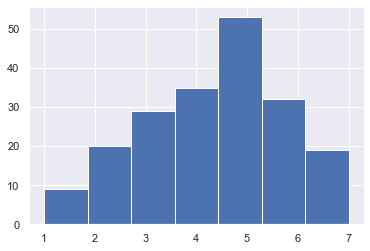

In [5]:
processed['physical_ease'].hist(bins=7)

#### Distribution of ages
We can also easily create histograms to observe the frequencies of predefined nominal responses, such as the age and gender categories. However, as Python isn't that smart, and is not able to figure out the numerical order of these strings.

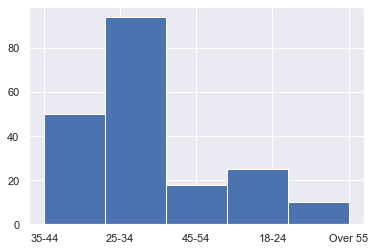

In [6]:
processed['age'].hist(bins=5);

Instead, we can use the `sort_values` method to re-order the data, telling a clearer picture.

<AxesSubplot:>

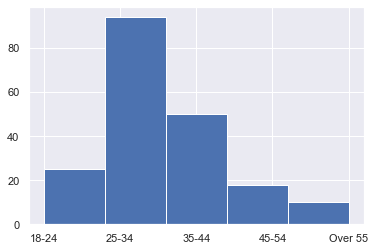

In [7]:
sorted_data = processed['age'].sort_values(ascending=True)
sorted_data.hist(bins=5)

#### Distribution of gender
Finally, we can also observe the values for the gender responses. This data skewed `man`, and there were a couple of responses that were infrequent.

<AxesSubplot:>

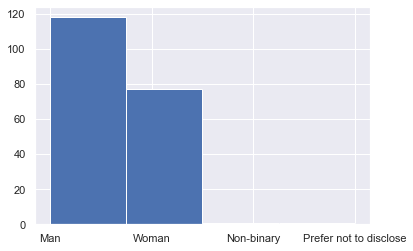

In [8]:
processed['gender'].hist(bins=4)

#### Combining histograms
Finally, we can also compare two histograms on one graph, to understand whether their distributions were different. In the graph below, we compare the "ease of finding dates in physical group settings" with the "ease of finding dates in online communities". We can see that the distributions are quite different. As we will see in Objective 2, these distributions are statistically different, leading us to infer that respondents were more likely to believe that it is harder to find dates in online communities.

<AxesSubplot:ylabel='Frequency'>

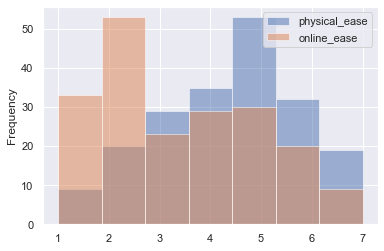

In [12]:
comparison = processed[['physical_ease','online_ease']]
comparison.plot.hist(bins=7, alpha=0.5)

As we have seen before, we can also retrieve the means of these responses. These will come in handy later.

In [10]:
app_mean = comparison['physical_ease'].mean()
community_mean = comparison['online_ease'].mean()

print("Ease of finding dates (in-person): " + str(round(app_mean, 2)) + ", Ease of finding dates (online communities) " + str(round(community_mean, 2)))

Ease of finding dates (in-person): 4.4, Ease of finding dates (online communities) 3.34


## *Challenge Question 1 (1 point)*
In addition to investigating "ease of finding dates" in online communities and in physical group settings, this survey also asked participants about the ease of finding dates using dating apps. Visualize the distribution of the ease of finding dates using dating apps and the ease of finding dates in physical settings. Also calculate the mean value for the ease of finding dating apps.

Are these distributions similar or different? Is the mean higher or lower? Add a comment to explain your view. 

# Objective 2: Make an inference from the data
Descriptive statistics are certainly interesting, though they can only get us so far. Much of the power of scientific reasoning comes from _inference_ or the ability to infer something from the data. 

At first glance, it can be tempting to simply infer that people find it find dates in person than when using dating apps. After all, the mean response was _higher_ for the question about meeting in person! But how do you know that this wasn't due to random chance? Are you sure you can make this inference? 

There's a whole discipline (arguably many disciplines) devoted to answering this exact question, and answering this is outside of the scope of the course. However, we can still explore a few things so that you can get a taste of how this science works.

### The 95% margin of error and the t-test
In this study, we sampled responses from 200 participants, which is a sizable number, but will not perfectly represent the whole population. Instead, we have a _sample_ of the real value. It would be desirable to know whether the differences observed in our data accurately represent the real world.

Fortunately, statisticians have developed just such techniques and they revolve around _confidence intervals_. Essentially, confidence intervals allow us to know, at a specified level of certainty, whether the data will fall within a range. In social sciences, we use a 95% threshold to determine an acceptable level of certainty. In other words, using high and low confidence intervals we can know with 95% certainty where the real value of a mean lies. This is why when you hear about political polls, they always give the qualifier: "between XX and YY values, 19 times out of 20"-- this is a confidence interval!

There is a lot we can do with confidence intervals, though perhaps most interestingly, you can use them to confidently infer that _two phenomena are different_. This is essentially what Student's t-test does; it compares the distributions of two collections of data and determines the probability that they came from the same source. Using this technique, we can make inferences from our data.
#### Research Question: Do people perceive it as more difficult to find dates using dating apps than through groups or online communities?
This leads us to a research question. In this dataset, we explored whether people perceived it as easier to find dates using dating apps than through physical groups or online communities. We can answer this question using confidence intervals and the t-test.

### Calculating mean and confidence intervals (CI)
Let's start by calculating mean and confidence intervals. Scipy is a library (or [ecosystem, according to them](https://www.scipy.org/)) that  provides many libraries that support scientific analysis. The scipy stats library has a lot of methods that will do the heavy lifting for us. For instance, we can use `stats.sem()` to calculate the standard error. The catch is that this environment does not like data frames, so we will have to convert it to numpy.

The function below can help further simplify all of this. This handy function was originally generated by [gcamargo (2018)](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) on Stackoverflow. I added a few comments to help explain it. We can use this to calculate the confidence intervals of our "ease of finding dates" responses.

In [13]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data) # convert our data frame into a numpy array
    n = len(a) # get the number of observations
    m, se = np.mean(a), stats.sem(a) # mean and standard error are calculated using scipy
    h = se * stats.t.ppf((1 + confidence) / 2., n-1) # the ppf function is for calculating 'percent point' and saves it as h (height)
    return m, m-h, m+h # mean, low bound CI, high bound CI


# call the function three times for each of the columns of interest
app_ease = mean_confidence_interval(processed['app_ease'])
physical_ease = mean_confidence_interval(processed['physical_ease'])
online_ease = mean_confidence_interval(processed['online_ease'])

### Visualize a table with confidence intervals
This is good, though we now need to convert this data back into a data frame. The code below manually creates a data frame using the results from the cell above. This is an important step because we can start to see the confidence intervals. 

**It is clear that we cannot conclude that people perceive it as easier to find dates in physical settings, though we can conclude that they find it _harder_ in online communities**. 

In [14]:
# create a new dictionary called d
d = {
    "Dating style": ["Dating Apps", "Physical Group", "Online Communities"],
    "Ease of finding dates": [app_ease[0], physical_ease[0], online_ease[0]],
    "CI Low": [app_ease[1], physical_ease[1], online_ease[1]],
    "CI High": [app_ease[2], physical_ease[2], online_ease[2]]
}

means = pd.DataFrame(data=d)  # convert d into a data frame
means

,Dating style,Ease of finding dates,CI Low,CI High
0,Dating Apps,4.274112,4.048528,4.499695
1,Physical Group,4.395939,4.169038,4.622840
2,Online Communities,3.335025,3.081940,3.588111


### Visualizing the confidence interval in a graph


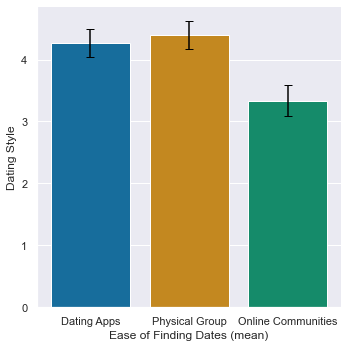

In [15]:
sns.set_palette("colorblind",10) # set seaborn to the colorblind pallette

# catplot is the method for making bar charts we saw last week
g = sns.catplot(
    data=means, kind="bar",
    x="Dating style", y="Ease of finding dates",
    ci=None, height=5, aspect=1,
)

# seaborn calles these error bars an we can use them to visualize our confidence interval
yerr = [means["Ease of finding dates"] - means['CI Low'], means['CI High'] - means["Ease of finding dates"]]

# add the error bar to our catplot
plt.errorbar(y=means["Ease of finding dates"], x=[0,1,2], yerr=yerr, fmt='none', c='black', capsize=4)

# set labels
g.set_axis_labels("Ease of Finding Dates (mean)", "Dating Style")

### Conduct t-tests to determine probabilities
Though we can visually observe the confidence intervals, it can also be valuable to conduct the standard t-test. In this case, it is most appropriate to use a test called a _paired t-test_ which we can borrow from the `scipy stats` library. As mentioned above, in this context the t-test tells us the t-statistic (a statistic about the difference between the data which we can ignore in this class) and the probability (a.k.a. `pvalue`) that two sample values have the same mean in reality. 

In the code below, we run three t-test comparisons:
- The probability that `app_ease` and `online_ease` have the same mean (less than 1 in a million chance)
- The probability that `physical_ease` and `online_ease` have the same mean (less than 1 in a million chance)
- The probability that `app_ease` and `physical_ease` have the same mean (36%)

In the case of the last comparison, we cannot conclude that the values are actually different. However, we can safely conclude that people perceive it as more difficult to find dates in online communities.

In [16]:
stats.ttest_rel(processed['app_ease'], processed['online_ease'])

Ttest_relResult(statistic=7.3561143221841565, pvalue=5.0571206776363395e-12)

In [17]:
stats.ttest_rel(processed['physical_ease'], processed['online_ease'])

Ttest_relResult(statistic=8.010517961737543, pvalue=9.975000937155575e-14)

In [18]:
stats.ttest_rel(processed['app_ease'], processed['physical_ease'])

Ttest_relResult(statistic=-0.9106326430616853, pvalue=0.3636075080817729)

## *Challenge Question 2 (1 point)*
In addition to three responses about the ease of finding dates, this data set contains questions about whether people are participating in the three activities more during Covid-19. These data are represented in the following columns:
- `processed['covid_apps_more']`
- `processed['covid_physical_more']`
- `processed['covid_online_more']`

Borrowing the code from above, calculate and visualize the confidence intervals for these three columns. You can visualize them either as a table or a bar chart. Add a comment about the implications of these findings.

## *Challenge Question 3 (1 point)*
Using the cells below, run at least one t-test on the "covid more" data. Add a comment about your interpretation of the pvale. 

# Objective 3: Dig into the app use data
That last objective was a doozie. Fortunately, we only have three objectives this week. In this final objective, we are going to dig into that app use data discussed earlier. As you recall, we collected multi-response questions from participants about the apps that they have used in the past. We then broke these into binary variables. The code below will add these values to your `processed` data frame.

In [20]:
# the apps that were used
processed['used_tinder'] = raw_data['Q3_tinder']
processed['used_bumble'] = raw_data['Q3_bumble']
processed['used_match'] = raw_data['Q3_match']
processed['used_pof'] = raw_data['Q3_pof']
processed['used_okcupid'] = raw_data['Q3_okcupid']
processed['used_hinge'] = raw_data['Q3_hinge']
processed['used_clover'] = raw_data['Q3_clover']
processed['used_grindr'] = raw_data['Q3_grindr']
processed['used_coffeebean'] = raw_data['Q3_coffeebean']
processed['used_meetme'] = raw_data['Q3_meetme']
processed['used_eharmony'] = raw_data['Q3_eharmony']
processed['used_jda'] = raw_data['Q3_jda']
processed['used_aff'] = raw_data['Q3_aff']
processed['used_facebook_dating'] = raw_data['Q3_facebook_dating']
processed['used_none'] = raw_data['Q3_never_used']

# affordances ... a.k.a. uses for the app
processed['affordance_short_term'] = raw_data['Q5_short_term']
processed['affordance_long_term'] = raw_data['Q5_long_term']
processed['affordance_friendship'] = raw_data['Q5_friendship']
processed['affordance_validation'] = raw_data['Q5_validation']
processed['affordance_entertainment'] = raw_data['Q5_entertainment']
processed['affordance_other'] = raw_data['Q5_other']
processed['affordance_never_used'] = raw_data['Q5_never_used']

processed.head()

,age,gender,apps_used,apps_purposes,apps_conversations,conversations_in_person,app_ease,physical_ease,online_ease,covid_apps_more,...,used_aff,used_facebook_dating,used_none,affordance_short_term,affordance_long_term,affordance_friendship,affordance_validation,affordance_entertainment,affordance_other,affordance_never_used
0,35-44,Man,"Tinder,Plenty of Fish",Finding short-term romantic or sexual relation...,Occasionally,Occasionally,7,7,5,1.0,...,0,0,0,1,0,0,0,0,0,0
1,25-34,Man,Plenty of Fish,Finding long-term romantic or sexual relations...,Rarely,Rarely,3,5,5,7.0,...,0,0,0,0,1,0,0,0,0,0
2,25-34,Woman,"Tinder,Bumble,Match,Plenty of Fish,OKCupid,Grindr",Finding short-term romantic or sexual relation...,Occasionally,Occasionally,5,7,6,6.0,...,0,0,0,1,1,0,0,0,0,0
3,35-44,Man,Tinder,Finding short-term romantic or sexual relation...,Occasionally,Rarely,2,1,1,1.0,...,0,0,0,1,1,0,0,1,0,0
4,25-34,Man,"Tinder,Bumble,OKCupid",Finding short-term romantic or sexual relation...,Rarely,Occasionally,3,4,2,1.0,...,0,0,0,1,1,1,0,0,0,0


There's a lot we can do with this data, both descriptive and inferential. Let's explore both before wrapping this up. 

### Visualizing most popular apps
One of the things that we can do is visualize the response counts. In the previous steps, we could do that using histograms, though this time, histograms won't be as helpful because the variables are binary. Instead, we can simply count the number reported and visualize the results in a graph. The code below creates a fresh data frame from the counts (measured as `len()`) for each of the binary measures. It then renders the result as a table.

In [21]:
# create a new dictionary with each of the apps, save the len() in the second column

d = {
        "Dating Apps Used": [
            "Tinder", 
            "Bumble", 
            "Match",
            "Plenty of Fish",
            "OK Cupid",
            "Hinge",
            "Clover",
            "Grindr",
            "Coffee & Bean",
            "MeetMe",
            "eHarmony",
            "JDA",
            "AFF",
            "Facebook Dating",
            "Never Used"
        ],
        "Number Reported": [
            len(processed[processed["used_tinder"] == 1]),
            len(processed[processed["used_bumble"] == 1]),
            len(processed[processed["used_match"] == 1]),
            len(processed[processed["used_pof"] == 1]),
            len(processed[processed["used_okcupid"] == 1]),
            len(processed[processed["used_hinge"] == 1]),
            len(processed[processed["used_clover"] == 1]),
            len(processed[processed["used_grindr"] == 1]),
            len(processed[processed["used_coffeebean"] == 1]),
            len(processed[processed["used_meetme"] == 1]),
            len(processed[processed["used_eharmony"] == 1]),
            len(processed[processed["used_jda"] == 1]),
            len(processed[processed["used_aff"] == 1]),
            len(processed[processed["used_facebook_dating"] == 1]),
            len(processed[processed["used_none"] == 1])
        ]
    }

counts = pd.DataFrame(data=d) # turn this into a data frame
counts

,Dating Apps Used,Number Reported
0,Tinder,117
1,Bumble,49
2,Match,65
3,Plenty of Fish,65
4,OK Cupid,72
5,Hinge,16
6,Clover,2
7,Grindr,25
8,Coffee & Bean,15
9,MeetMe,28


We can see from the data that Tinder is the most popular app, followed by OK Cupid. If we wanted to visualize these results, we can create a `catplot` like we have so many times before. In this case, we can also remove the apps with fewer than 5% of the responses, for simplicity. This helps us understand which apps have been used.

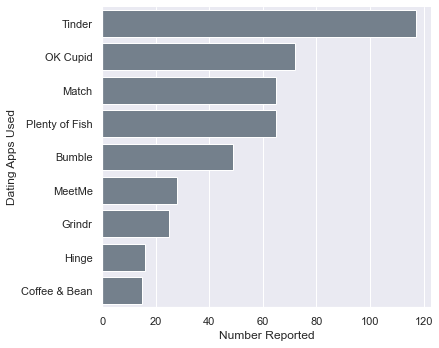

In [22]:
clean_counts = counts.sort_values(by="Number Reported", ascending=False) # let's sort the values
clean_counts = clean_counts[clean_counts["Number Reported"] > 10] # remove the values that are fewer than 20

# create a catplot, as before
g = sns.catplot(
        data=clean_counts, kind="bar",
        x="Number Reported", y="Dating Apps Used",
        height=5, aspect=1.25, color="slategray"
    )

### Research Question: Do Tinder users go out more during Covid-19?
In addition to visual analytics, we can also investigate differences among people who use certain apps and those who do not. For example, we might ask whether Tinder users go out more during Covid-19. 

How would we do this? From a theoretical perspective, it is important to note that this type of test is different from the previous case, because we are comparing two _different_ groups of people, rather than a difference _among_ a group of people. For this type of test, we will want to use an independent t-test, rather than a paired test. This type of test is optimized for comparing two different groups.

As before, we can visualize the distributions to see if there are visual differences in their responses. The following code displays the responses to the `covid_physical_more` question among tinder users and people who never used tinder.

<AxesSubplot:>

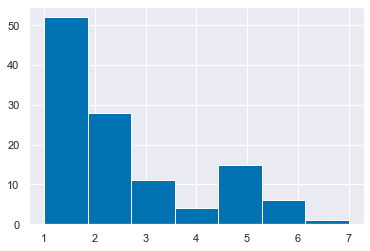

In [23]:
tinder_users = processed[processed["used_tinder"] == 1]
tinder_users['covid_physical_more'].hist(bins=7)

<AxesSubplot:>

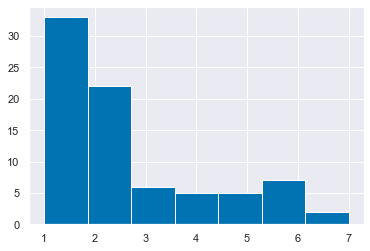

In [24]:
tinder_nonusers = processed[processed["used_tinder"] == 0]
tinder_nonusers['covid_physical_more'].hist(bins=7)

It doesn't look like there are many differences in response to this question. We can test the difference by using the independent t-test, as described. The code below implements the `ttest_ind` instead, revealing that there is probably no difference between these two samples.

In [25]:
stats.ttest_ind(tinder_users['covid_physical_more'], tinder_nonusers['covid_physical_more'])

Ttest_indResult(statistic=-0.40129158995689573, pvalue=0.6886448578862463)

Can you think of other tests that you might want to run? Try it by playing with the code!

### Where to learn more
This brings us to the end of this week's lab. However, if you would like to learn more about statistics and statistical testing, I have two recommendations:

1. [Khanacademy's Statistics and probability](https://www.khanacademy.org/math/statistics-probability);
2. [Cumming & Calin-Jageman's _Introduction to The New Statistics_](https://thenewstatistics.com/itns/).

I am always eager to speak more about these topics!

## *Challenge Question 4 (1 point)*
In addition to the dating apps that were used, participants answered questions about _affordances_, or the purpose of using apps. Visualize the results from the affordances responses, similarly to the steps shown above, so that we can understand the most commonly cited reasons for using dating apps.

## *Challenge Question 5 (1 point)*
There is still a lot that can be learned from this data. Formulate a hypothesis about the affordances data and test it using a t-test. Similarly to the steps shown above, visualize the distributions of a particular question response among participants who held an affordance as well as those __who did not have it__. Write in a comment whether the observed research question was answered.

# More on stats - (No challenge questions beyond here)
We've covered a lot of ground, and I don't particularly want to challenge you to _another_ question. However, there are two more topics in basic statistics that are worth discussing here. These are:
- Correlation
- Regression

This section will highlight these two concepts interactively without bringing in more challenge questions. This will be useful for many of your final projects, as many students seem interested in investigating the relationships between variables. To demonstrate these things, we will explore the following research question:

### RQ: Is there a relationship between perceived ease of finding dates and whether people report dating more during Covid-19? 

### Creating aggregated measures
Psychologists often measure _constructs_ using multiple questionnaire items. In this case, we had three items which collected information on the `ease of finding dates`. We also had three items which denoted `doing more during covid`. We can combine the `ease` measures together to get a measure of `overall_ease` which roughly measures whether people perceive it as easy to find dates in general. Likewise `overall_covid_more` is a rough measure of whether people are dating more during the Covid-19 pandemic. With these combined measures, we can have a good understanding of whether there is a relationship between people's perceived ease of finding dates and whether they are more active during Covid-19.

In [26]:
processed['overall_ease'] = raw_data['Q13'] + raw_data['Q20'] + raw_data['Q27'] # adds a new overall_ease measure
processed['overall_covid_more'] = raw_data['Q28'] + raw_data['Q29'] + raw_data['Q30'] # adds a new overall_covid_more measure

## Correlation
Correlation describes a statistical common trend between two variables in either a positive or negative direction. One of the most important statistics for determining a possible relationship between two variables is called the `Pearson r`. The `r` (not to be confused with the R programming language) is a measure of statistical fit between two variables. At `r = 1`, as one variable increases, the other increases at the exact same amount. At `r=0` there is no relationship in the trend between the two variables.

One of the best ways to illustrate a Pearson r is with a scatterplot. Execute the code below and you will see a visualization of the relationship between the `overall_ease` and `overall_covid_more`. 

<AxesSubplot:xlabel='overall_covid_more', ylabel='overall_ease'>

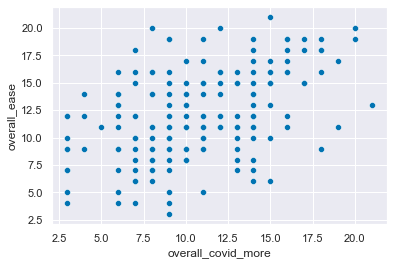

In [27]:
sns.scatterplot(data=processed, x="overall_covid_more", y="overall_ease")

### Is the trend significant?
You will see in this graph that as `overall_ease` increases, so too does `overall_covid_more`. This is because the two variables are correlated. From the perspective of social science, this is in fact a really nice correlation that is highly suggestive.

To calculate the Pearson r using Python, you can use the `pearsonr()` method from the Scipy stats library. The code below calculates the r for us. Note that this method returns two values. The first is r, while the second is the p-value of the significance of the correlation. In this case, `p < 0.0001`, which means that it is very unlikely due to random chance that we observed this correlation.


In [28]:
stats.pearsonr(processed['overall_ease'], processed['overall_covid_more'])

(0.4659256845895968, 5.218077321898574e-12)

Of course, correlation does not mean that there is causation. This is why scientific papers have discussion sections :)

## Regression
While correlation is a useful measure, we might wish to take it one step further. Similarly to correlations, `regression` is a measure of the relationship between two (or more) variables. Unlike correlation, this is a tool designed to measure a causal relationship. A simple linear regression is a way of measuring the significance of the impact of one variable on another. The `regplot` below demonstrates this concept.

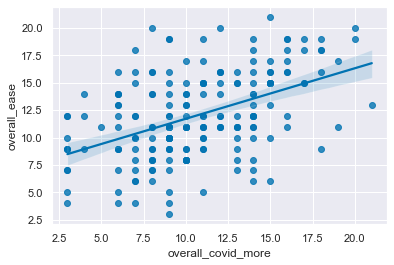

In [29]:
sns.regplot(x="overall_covid_more", y="overall_ease", data=processed);

### Measuring the impact
This type of regression is simply a calculation of a straight line that best fits the Pearson correlation (known as _ordinary least squares_). Essentially, it quantifies the size of the calculated impact of `overall_ease` on `overall_covid_more`. By observing this relationship we have addressed our research question. The answer is _possibly_. At least, the statistics show evidence for this... a deeper investigation might be warranted though because there are many possible explanations for this observation! 

The code below determines the results of a linear regression between these two variables. The results show that the relationship has a significant p-value, and could reflect a real relationship.

In [ ]:
stats.linregress(x=processed["overall_ease"], y=processed["overall_covid_more"])

## References

Cumming, G., & Calin-Jageman, R. (2016). Introduction to the new statistics: Estimation, open science, and beyond. Routledge.

Diaz, G. O., and Conrad, C. (working paper). Social presence and trust influence the perceived ease of finding dates in online communities during Covid-19. 

gcamargo (August 6 2018). Compute a confidence interval from sample data. _Stack Overflow_. https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

Khanacademy. Statistics and Probability. https://www.khanacademy.org/math/statistics-probability

Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van Mulbregt, P. (2020). SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature methods, 17(3), 261-272.